# Plotting for Binary Results

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
resultsAutogluonDf = pd.read_csv('../results_binary_autogluon.csv')
resultsSklearnDf = pd.read_csv('../results_binary_sklearn.csv')

In [3]:
resultsAutogluonDf['source'] = 'autogluon'
resultsAutogluonDf

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order,source
0,XGBoost,0.862295,0.8624,accuracy,0.034896,0.006921,1.392398,0.034896,0.006921,1.392398,1,True,8,autogluon
1,NeuralNetTorch,0.862295,0.8624,accuracy,0.214610,0.012760,65.787699,0.214610,0.012760,65.787699,1,True,9,autogluon
2,RandomForestEntr,0.862295,0.8624,accuracy,0.383619,0.081269,8.117567,0.383619,0.081269,8.117567,1,True,5,autogluon
3,RandomForestGini,0.862295,0.8624,accuracy,0.388786,0.081144,7.966919,0.388786,0.081144,7.966919,1,True,4,autogluon
4,ExtraTreesGini,0.862295,0.8624,accuracy,0.392690,0.093991,6.984248,0.392690,0.093991,6.984248,1,True,6,autogluon
5,ExtraTreesEntr,0.862295,0.8624,accuracy,0.403470,0.080082,6.811753,0.403470,0.080082,6.811753,1,True,7,autogluon
6,WeightedEnsemble_L2,0.862295,0.8624,accuracy,0.407601,0.082108,6.930146,0.004131,0.002026,0.118393,2,True,10,autogluon
7,NeuralNetFastAI,0.862295,0.8624,accuracy,0.723723,0.056632,131.717333,0.723723,0.056632,131.717333,1,True,3,autogluon
8,KNeighborsUnif,0.831862,0.8280,accuracy,3.397084,0.191654,4.298899,3.397084,0.191654,4.298899,1,True,1,autogluon
9,KNeighborsDist,0.831814,0.8280,accuracy,2.933942,0.145967,0.358532,2.933942,0.145967,0.358532,1,True,2,autogluon


In [4]:
resultsSklearnDf = resultsSklearnDf.rename(columns={'Accuracy': 'score_test'})
resultsSklearnDf['source'] = 'sklearn'
resultsSklearnDf

,model,score_test,TrainingTime,PredictionTime,source
0,SVM Linear Kernel,0.862295,231.557555,50.666344,sklearn
1,Decision Tree Classifier,0.862295,0.047999,0.003725,sklearn
2,Logistic Regression,0.862295,0.190450,0.003470,sklearn


In [5]:
resultsDf = pd.concat([resultsAutogluonDf[['model', 'score_test', 'source']], resultsSklearnDf[['model', 'score_test', 'source']]])
resultsDf

,model,score_test,source
0,XGBoost,0.862295,autogluon
1,NeuralNetTorch,0.862295,autogluon
2,RandomForestEntr,0.862295,autogluon
3,RandomForestGini,0.862295,autogluon
4,ExtraTreesGini,0.862295,autogluon
5,ExtraTreesEntr,0.862295,autogluon
6,WeightedEnsemble_L2,0.862295,autogluon
7,NeuralNetFastAI,0.862295,autogluon
8,KNeighborsUnif,0.831862,autogluon
9,KNeighborsDist,0.831814,autogluon


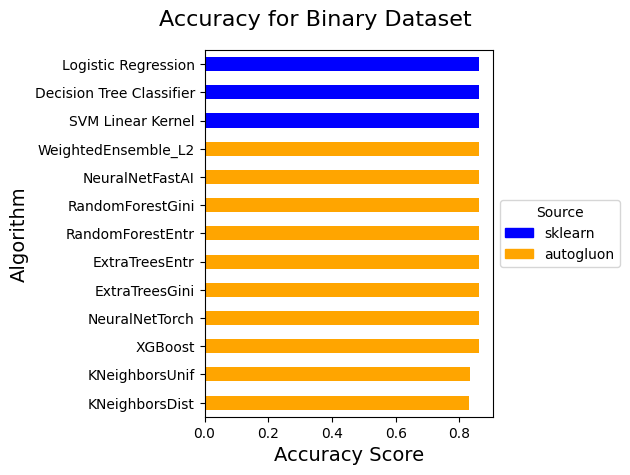

In [6]:
import matplotlib.patches as mpatches

toPlot = resultsDf.sort_values('score_test')
colors = {'autogluon': 'orange', 'sklearn': 'blue'}
ax = toPlot.plot.barh(x='model', y='score_test', color=toPlot['source'].map(colors))
plt.suptitle('Accuracy for Binary Dataset', fontsize=16)
plt.xlabel('Accuracy Score', fontsize=14)
plt.ylabel('Algorithm', fontsize=14)

sklearn_patch = mpatches.Patch(color='blue', label='sklearn')
autogluon_patch = mpatches.Patch(color='orange', label='autogluon')
legend_handles = [sklearn_patch, autogluon_patch]
plt.legend(handles=legend_handles, title='Source', loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.tight_layout()
plt.savefig('binary_accuracies_plot.png', bbox_inches='tight')

In [7]:
predictionsDf = pd.read_csv('../predictions_binary_autogluon.csv')
predictionsDf.head()

,predictions,actual
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0


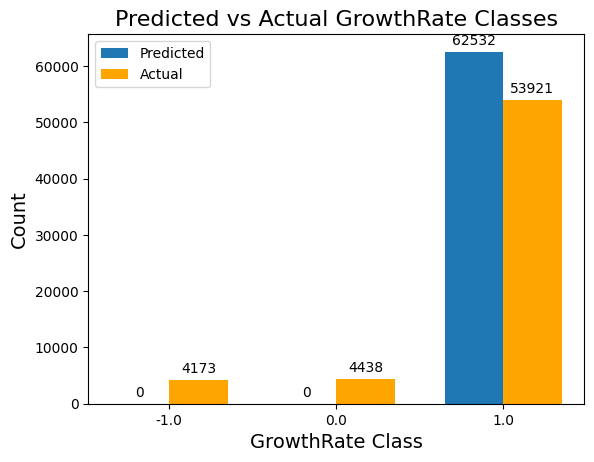

In [8]:
classes = sorted(set(predictionsDf['predictions']).union(predictionsDf['actual']))

# Count the occurrences of each class for predictions and actuals
predicted_counts = predictionsDf['predictions'].value_counts().reindex(classes, fill_value=0)
actual_counts = predictionsDf['actual'].value_counts().reindex(classes, fill_value=0)

# Plotting
bar_width = 0.35
index = range(len(classes))
fig, ax = plt.subplots()
bars1 = ax.bar(index, predicted_counts, bar_width, label='Predicted')
bars2 = ax.bar([i + bar_width for i in index], actual_counts, bar_width, label='Actual', color='orange')

# Add counts of each bar
for bar in bars1:
    height = bar.get_height()
    plt.annotate('{}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    plt.annotate('{}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

# Customizing plot
plt.xlabel('GrowthRate Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Predicted vs Actual GrowthRate Classes', fontsize=16)
plt.xticks([i + bar_width/2 for i in index], classes)
plt.legend()

# Show plot
plt.savefig('binary_predictions_plot.png', bbox_inches='tight')
plt.show()

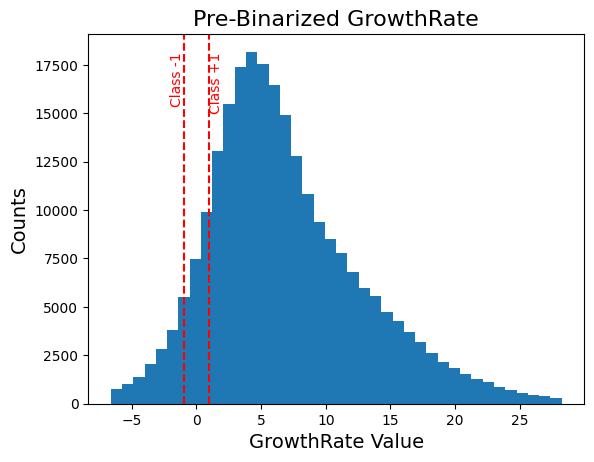

In [9]:
rawGrowthRateDf = pd.read_csv('../raw_growth_rates.csv')
minVal = rawGrowthRateDf['GrowthRate'].quantile(0.01)
maxVal = rawGrowthRateDf['GrowthRate'].quantile(0.99)
filteredDf = rawGrowthRateDf[rawGrowthRateDf['GrowthRate'].between(minVal, maxVal)]

filteredDf['GrowthRate'].hist(bins=40)

# Customizing plot
plt.xlabel('GrowthRate Value', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Pre-Binarized GrowthRate', fontsize=16)
plt.grid(False)
plt.axvline(x=-1, color='r', linestyle='--')
plt.axvline(x=1, color='r', linestyle='--')
plt.text(-1, plt.gca().get_ylim()[1]*0.95, 'Class -1', rotation=90, color='r', ha='right', va='top')
plt.text(1, plt.gca().get_ylim()[1]*0.95, 'Class +1', rotation=90, color='r', ha='left', va='top')

# Show plot
plt.savefig('raw_growthrate_plot.png', bbox_inches='tight')
plt.show()

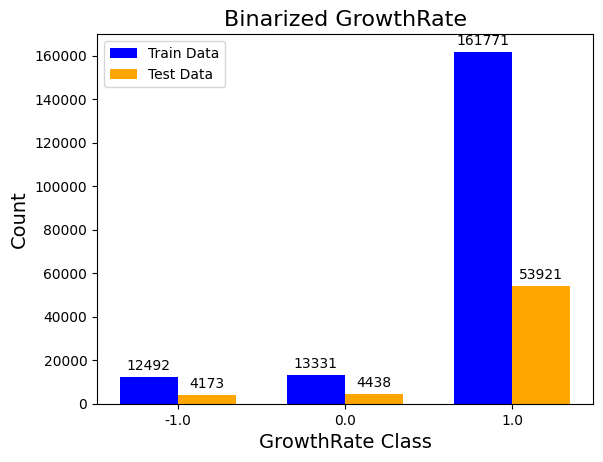

In [16]:
train_data = pd.read_csv('../binary_train_data.csv')
test_data = pd.read_csv('../binary_test_data.csv')

test_classes = sorted(set(test_data['GrowthRate']))
train_classes = sorted(set(train_data['GrowthRate']))

test_counts = pd.Series(test_data['GrowthRate']).value_counts().reindex(test_classes, fill_value=0)
train_counts = pd.Series(train_data['GrowthRate']).value_counts().reindex(train_classes, fill_value=0)

# Plotting
bar_width = 0.35
index = range(len(test_classes))
fig, ax = plt.subplots()
bars1 = ax.bar(index, train_counts, bar_width, label='Train Data', color='blue')
bars2 = ax.bar([i + bar_width for i in index], test_counts, bar_width, label='Test Data', color='orange')

# Add counts of each bar
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Customizing plot
plt.xlabel('GrowthRate Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Binarized GrowthRate', fontsize=16)
plt.xticks([i + bar_width/2 for i in index], test_classes)
plt.legend()

# Show plot
plt.savefig('binarized_growthrate_plot.png', bbox_inches='tight')
plt.show()

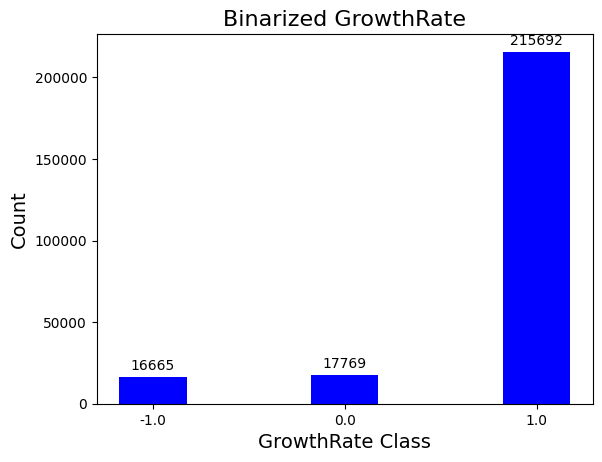

In [17]:
# Read the dataset
data = pd.read_csv('../binary_dataset.csv')

# Get unique classes from the dataset
classes = sorted(set(data['GrowthRate']))

# Count the occurrences of each class
counts = pd.Series(data['GrowthRate']).value_counts().reindex(classes, fill_value=0)

# Plotting
bar_width = 0.35
index = range(len(classes))
fig, ax = plt.subplots()
bars = ax.bar(index, counts, bar_width, label='Data', color='blue')

# Add counts of each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Customizing plot
plt.xlabel('GrowthRate Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Binarized GrowthRate', fontsize=16)
plt.xticks([i for i in index], classes)

# Show plot
plt.savefig('binarized_growthrate_alldata_plot.png', bbox_inches='tight')
plt.show()